In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve, roc_curve, auc,
    classification_report, precision_score, recall_score, roc_auc_score
)
import  statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
train_data=pd.read_csv('/content/Titanic_train.csv')

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


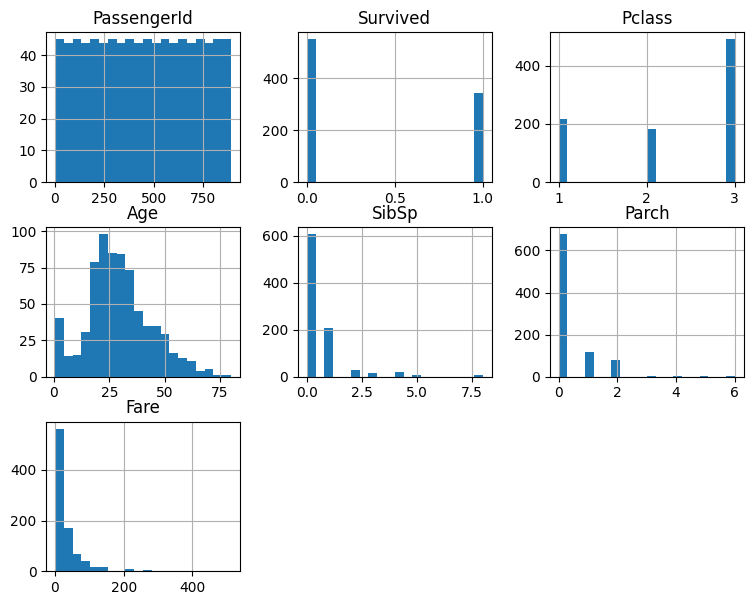

In [6]:
train_data.hist(bins=20,figsize=(9,7))
plt.show()

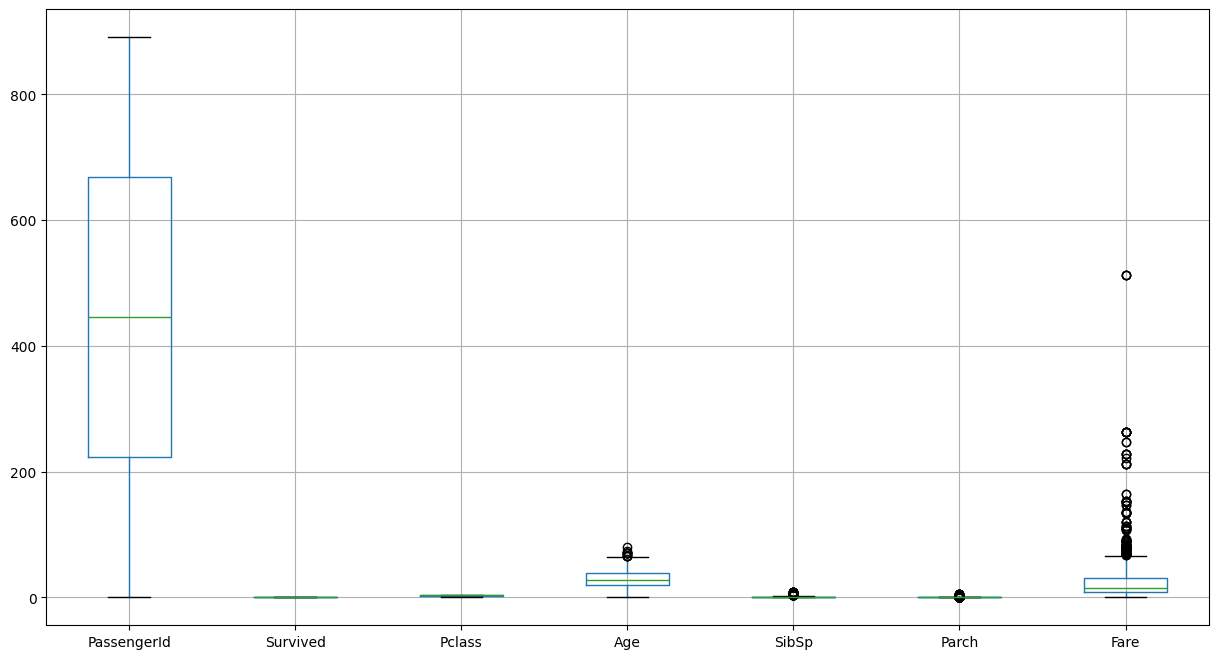

In [7]:
train_data.boxplot(figsize=(15,8))
plt.show()

In [8]:
train_data.drop('Cabin',inplace=True,axis=1)

In [9]:
train_data.drop('Name', inplace = True, axis = 1)

In [10]:
train_data.drop('PassengerId', inplace=True,axis = 1)

In [11]:
train_data.drop('Ticket',inplace=True,axis =1)

In [12]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
train_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [14]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

/tmp/ipython-input-182476827.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)


In [15]:
train_data['Embarked'].fillna(train_data['Embarked'].mode().iloc[0],inplace=True)

/tmp/ipython-input-2629431751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode().iloc[0],inplace=True)


In [16]:
train_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


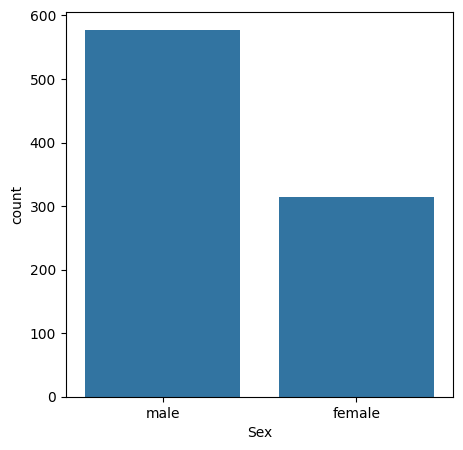

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x='Sex',data=train_data)
plt.show()

In [18]:
lb = LabelEncoder()
train_data['Sex_encoded'] = lb.fit_transform(train_data['Sex'])

In [19]:
lb2 = LabelEncoder()
train_data['Embarked_encoded'] = lb2.fit_transform(train_data['Embarked'])

In [20]:
x = train_data[["Pclass","Sex_encoded","Age","SibSp","Parch","Embarked_encoded"]]

In [21]:
y =train_data ['Survived']

In [22]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [23]:
x

,Pclass,Sex_encoded,Age,SibSp,Parch,Embarked_encoded
0,3,1,22.000000,1,0,2
1,1,0,38.000000,1,0,0
2,3,0,26.000000,0,0,2
3,1,0,35.000000,1,0,2
4,3,1,35.000000,0,0,2
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,2
887,1,0,19.000000,0,0,2
888,3,0,29.699118,1,2,2
889,1,1,26.000000,0,0,0


In [24]:
x.isnull().sum()

,0
Pclass,0
Sex_encoded,0
Age,0
SibSp,0
Parch,0
Embarked_encoded,0


In [25]:
x = sm.add_constant(x)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

            Feature        VIF
0             const  23.960659
1            Pclass   1.182829
2       Sex_encoded   1.106652
3               Age   1.204258
4             SibSp   1.251240
5             Parch   1.279788
6  Embarked_encoded   1.042699


In [27]:
from sklearn import linear_model

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=11)

In [29]:
#L1_regularzation
lasso = linear_model.Lasso(alpha=0.0000001,max_iter=1000,tol=0.1)

In [30]:
lasso.fit(x_train,y_train)

Lasso(alpha=1e-07, tol=0.1)

In [31]:
lasso.score(x_train,y_train)

0.3722735375439348

In [32]:
lasso.score(x_test,y_test)

0.46647317860365134

In [33]:
#L2_rigde
ridge = linear_model.Ridge(alpha=0.1,max_iter=100,tol=0.1)

In [34]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1, max_iter=100, tol=0.1)

In [35]:
ridge.score(x_train,y_train)

0.37227343284761927

In [36]:
ridge.fit(x_test,y_test)

Ridge(alpha=0.1, max_iter=100, tol=0.1)

In [37]:
ridge.score(x_test,y_test)

0.4840921664483889

In [38]:
lg = LogisticRegression()

In [39]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred=lg.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

In [41]:
accuracy_score=lg.score(x_test,y_test)
print(accuracy_score)

0.8475336322869955


In [42]:
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


In [43]:
grid = GridSearchCV(lg, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [44]:
print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

# Test accuracy on unseen data
y_pred = grid.predict(x_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.7829648748737515
Test accuracy: 0.8385650224215246


In [46]:
# Predict labels
y_pred = grid.predict(x_test)

# Predict probabilities (for ROC curve)
y_prob = grid.predict_proba(x_test)[:, 1]

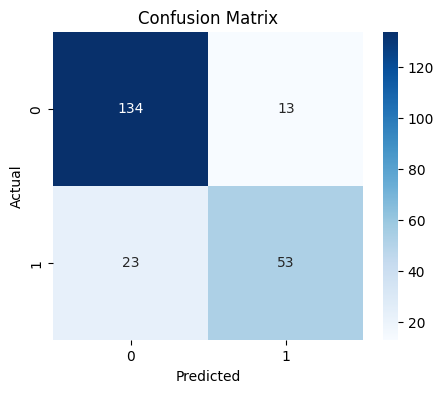

In [47]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       147
           1       0.80      0.70      0.75        76

    accuracy                           0.84       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.84      0.84      0.84       223



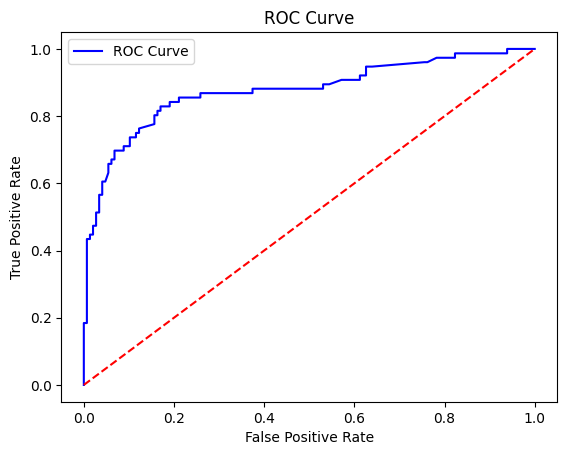

ROC-AUC Score: 0.8754475474400285


In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


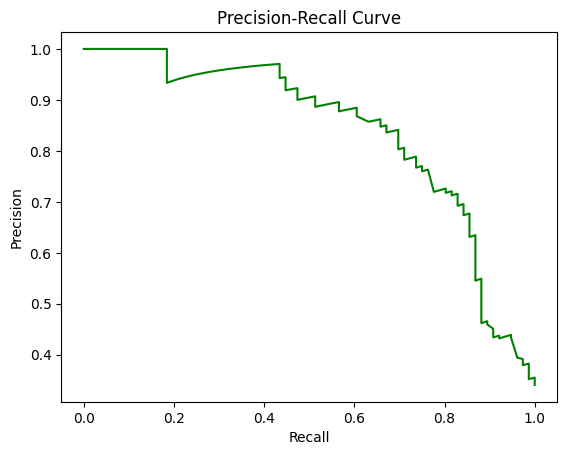

In [50]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [51]:
#regularization is used to control the model complexity
#if c is too small model will be low accuracy
#if c is too large model is overfit which means excellent in traing but
#wont perform that well in test data
#by using cross validation u can over come with this issues